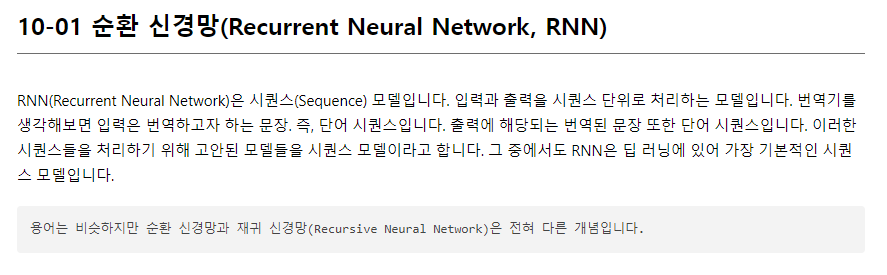

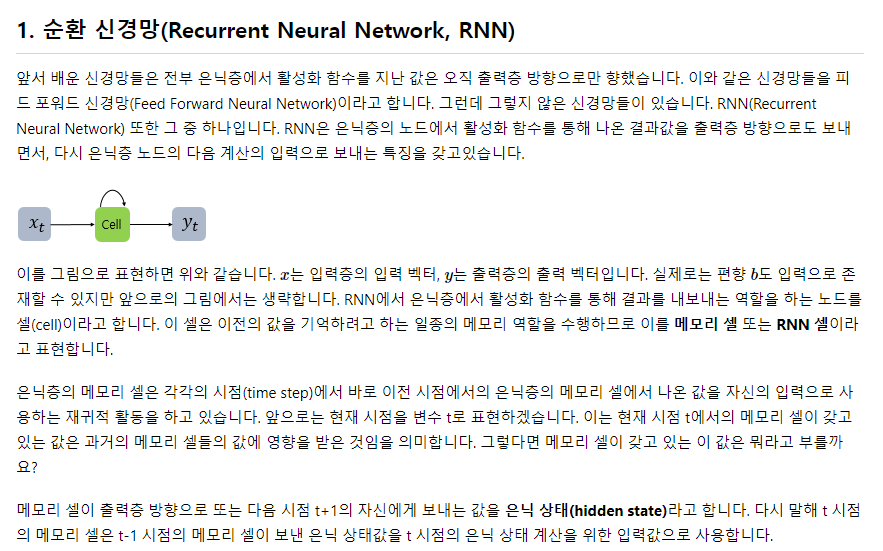

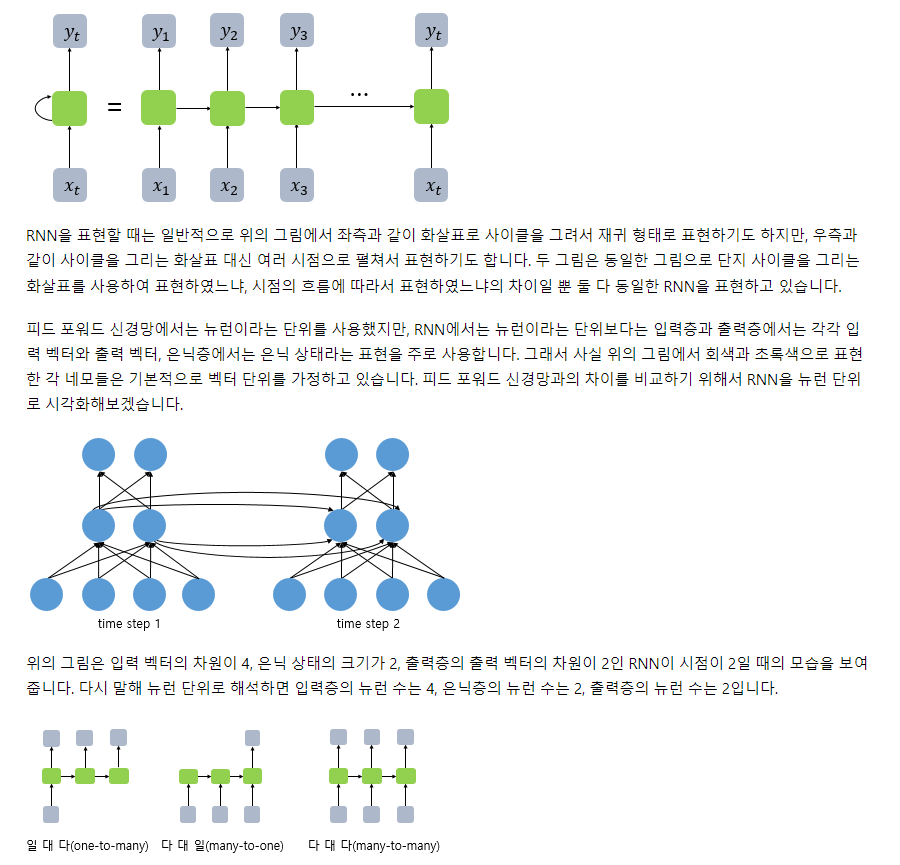

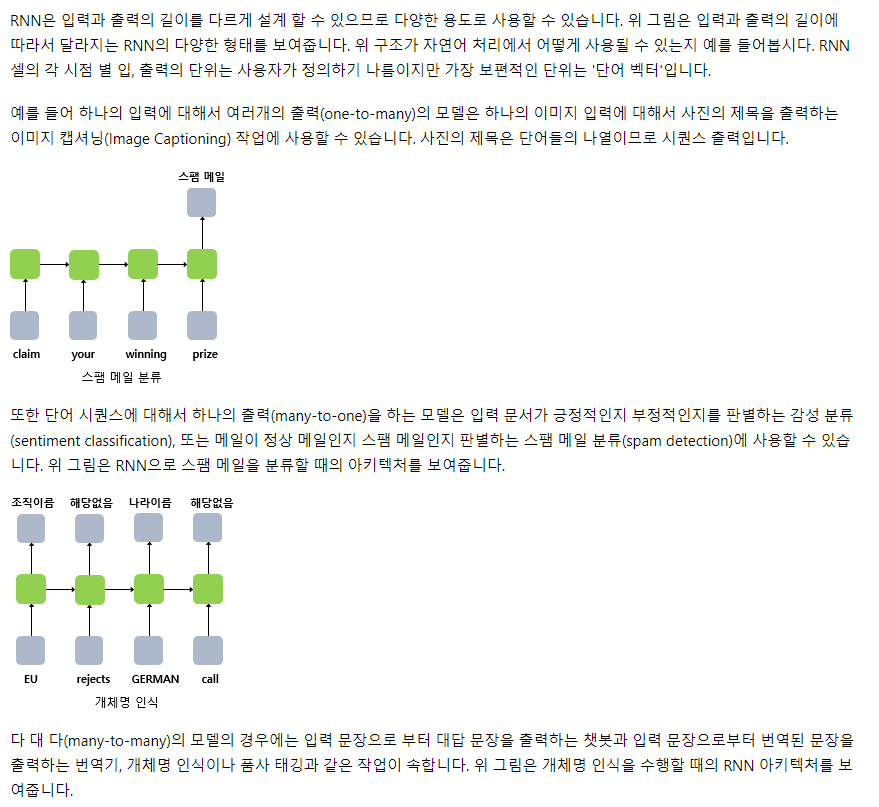

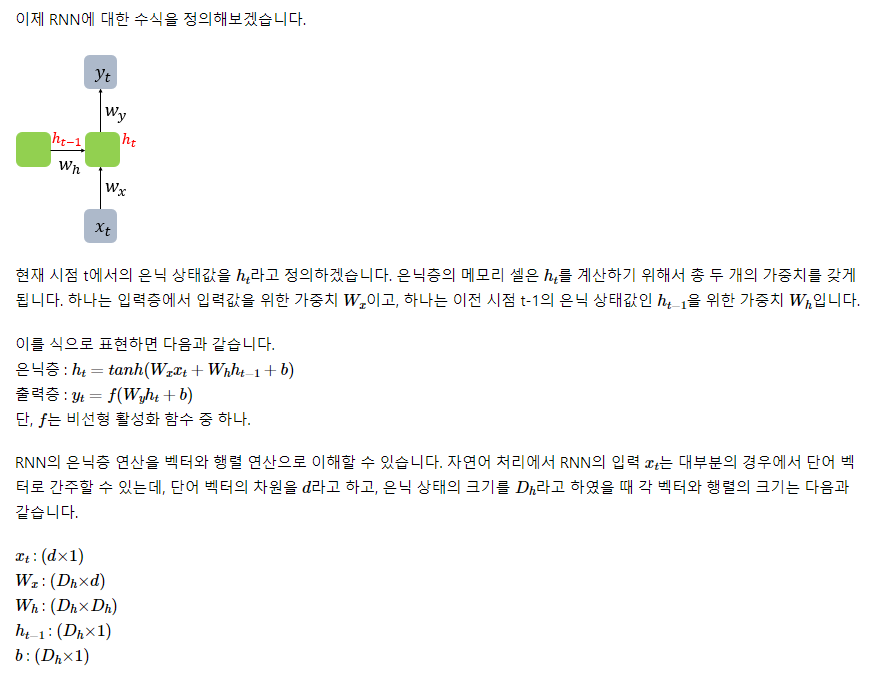

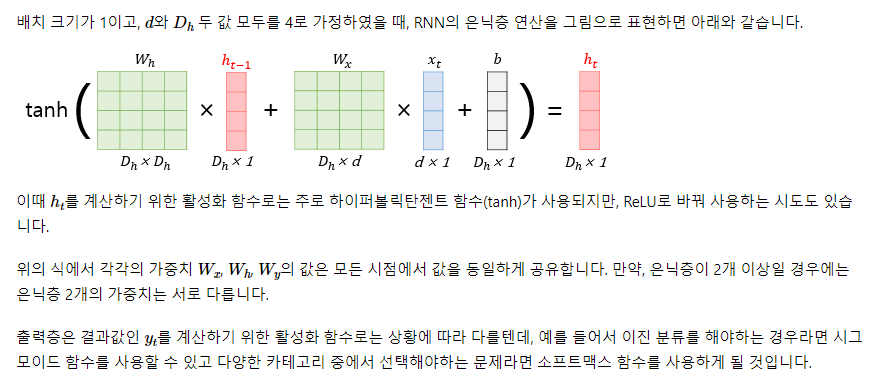

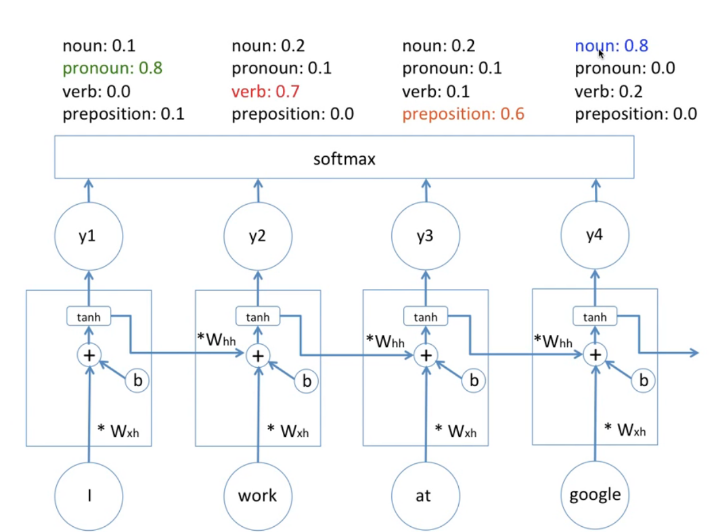

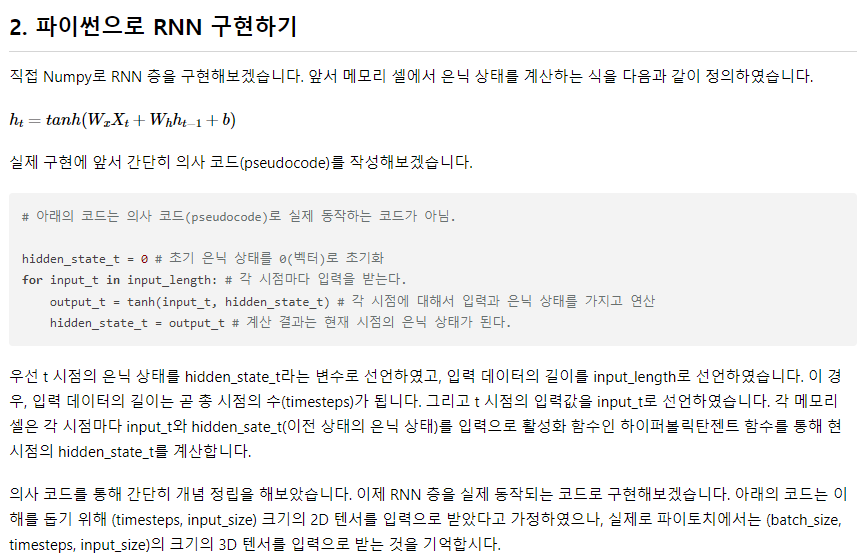

In [ ]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_size = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

우선 시점, 입력의 차원, 은닉 상태의 크기, 그리고 초기 은닉 상태를 정의하였습니다. 현재 초기 은닉 상태는 0의 값을 가지는 벡터로 초기화가 된 상태입니다. 초기 은닉 상태를 출력해보겠습니다.

In [ ]:
print(hidden_state_t) # 8의 크기를 가지는 은닉 상태. 현재는 초기 은닉 상태로 모든 차원이 0의 값을 가짐.

[0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [ ]:
# 가중치와 편향을 각 크기에 맞게 정의하였습니다. 가중치와 편향의 크기를 출력해보겠습니다.
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


각 가중치와 편향의 크기는 다음과 같습니다. Wx는 (은닉 상태의 크기 × 입력의 차원), Wh는 (은닉 상태의 크기 × 은닉 상태의 크기), b는 (은닉 상태의 크기)의 크기를 가집니다. 이제 모든 시점의 은닉 상태를 출력한다고 가정하고, RNN 층을 동작시켜봅시다.

In [ ]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.75817458 0.94152027 0.97019025 0.90978793 0.93529189 0.92412288
  0.81614367 0.71146714]
 [0.9998095  0.99997297 0.99995243 0.9999926  0.99997232 0.99996443
  0.99998391 0.9999728 ]
 [0.99983771 0.99993183 0.99986739 0.99998791 0.99996165 0.99991086
  0.99998727 0.99998459]
 [0.9997615  0.9999806  0.99993281 0.99999556 0.99997378 0.99997744
  0.99998973 0.99999433]
 [0.99995248 0.99998709 0.99996386 0.99999675 0.99998835 0.99998633
  0.99998809 0.9999938 ]
 [0.99990637 0.99994979 0.99989206 0.99999268 0.99996965 0.99993944
  0.99998604 0.99998007]
 [0.99995135 0.99999484 0.99998509 0.99999829 0.99999298 0.99999375
  0.999993   0.99999707]
 [0.99992559 0.99996913 0.99993886 0.99999318 0.99998083 0.99996099
  0.99998891 0.99999012]
 [0.99994743 0.99999512 0.99999177 0.99999786 0.99999452 0.99999138
  0.99999653 0.99999794]
 [0.99980498 0.99996273 0.99990197 0.99998962 0.99997093 0.9999574
  0.99998692 0.99999396]]

### 3. 파이토치의 nn.RNN()
파이토치에서는 nn.RNN()을 통해서 RNN 셀을 구현합니다. 실습을 통해 이해해봅시다. 우선 필요한 파이토치의 도구들을 임포트합니다.

In [1]:
import torch
import torch.nn as nn

이제 입력의 크기와 은닉 상태의 크기를 정의합니다. 은닉 상태의 크기는 대표적인 RNN의 하이퍼파라미터입니다. 여기서 입력의 크기는 매 시점마다 들어가는 입력의 크기를 의미합니다.

In [2]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

이제 입력 텐서를 정의합니다. 입력 텐서는 (배치 크기 × 시점의 수 × 매 시점마다 들어가는 입력)의 크기를 가집니다. 여기서는 배치 크기는 1, 10번의 시점동안 5차원의 입력 벡터가 들어가도록 텐서를 정의합니다.

In [3]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

이제 nn.RNN()을 사용하여 RNN의 셀을 만듭니다. 인자로 입력의 크기, 은닉 상태의 크기를 정의해주고, batch_first=True를 통해서 입력 텐서의 첫번째 차원이 배치 크기임을 알려줍니다.

In [4]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

In [5]:
# 입력 텐서를 RNN 셀에 입력하여 출력을 확인해봅시다.
outputs, _status = cell(inputs)

RNN 셀은 두 개의 입력을 리턴하는데, 첫번째 리턴값은 모든 시점(timesteps)의 은닉 상태들이며, 두번째 리턴값은 마지막 시점(timestep)의 은닉 상태입니다. 우선 첫번째 리턴값에 대해서 크기를 확인해봅시다.

In [6]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


첫번째 리턴값의 은닉 상태들은 (1, 10, 8)의 크기를 가집니다. 이는 10번의 시점동안 8차원의 은닉상태가 출력되었다는 의미입니다. 두번째 리턴값. 다시 말해 마지막 시점의 은닉 상태의 크기를 확인해보겠습니다.

In [7]:
print(_status.shape) # 최종 time-step의 hidden_state

torch.Size([1, 1, 8])


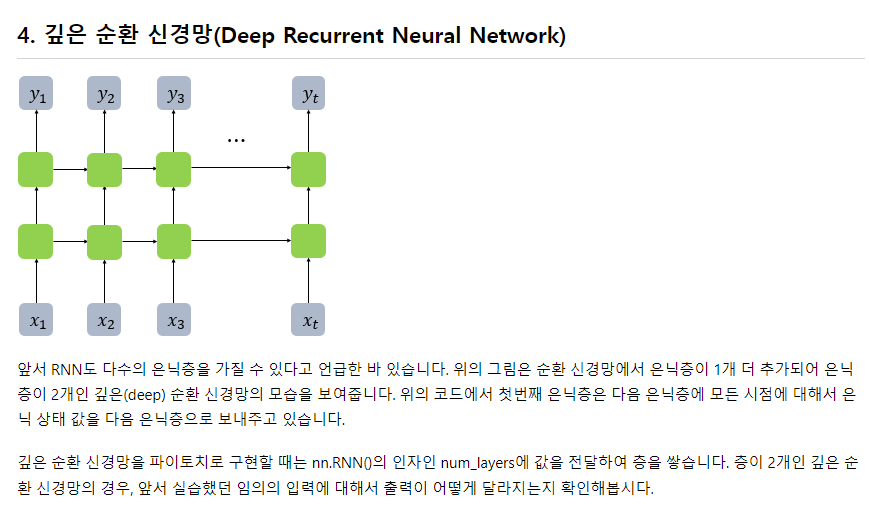

In [8]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [12]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True)

In [14]:
outputs, _status = cell(inputs)

In [16]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


In [15]:
# 첫번째 리턴값의 크기는 층이 1개였던 RNN 셀 때와 달라지지 않았습니다. 여기서는 마지막 층의 모든 시점의 은닉 상태들입니다.
print(_status.shape) # (층의 개수, 배치 크기, 은닉 상태의 크기)

torch.Size([2, 1, 8])


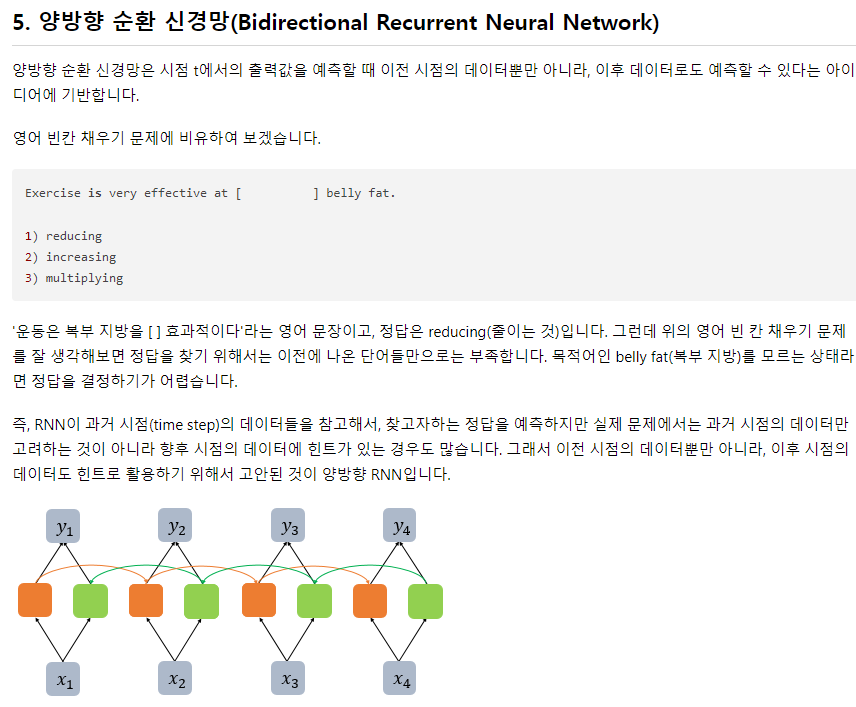

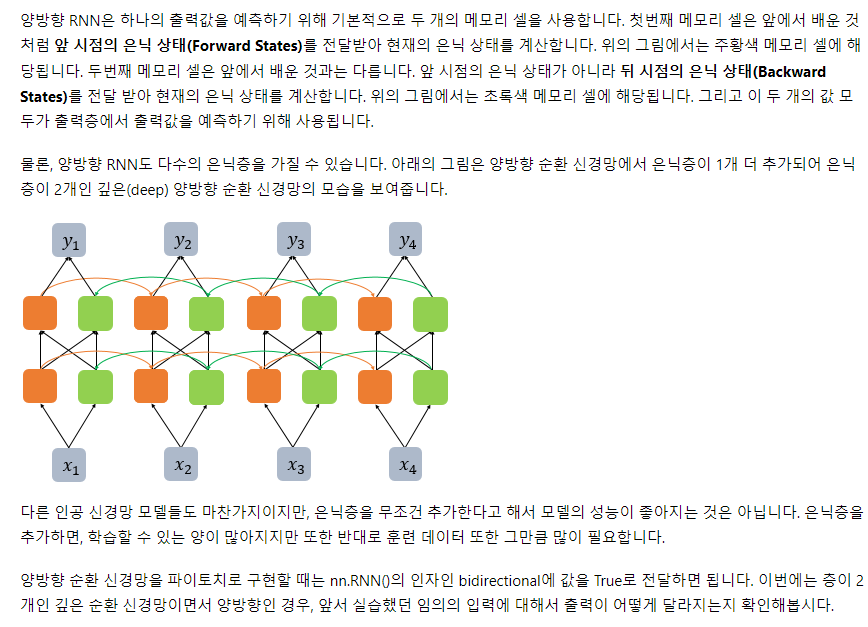

In [17]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [18]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True)

In [19]:
outputs, _status = cell(inputs)

In [20]:
print(outputs.shape) # (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)

torch.Size([1, 10, 16])


첫번째 리턴값의 크기는 단뱡 RNN 셀 때보다 은닉 상태의 크기의 값이 두 배가 되었습니다. 여기서는 (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)의 크기를 가집니다. 이는 양방향의 은닉 상태 값들이 연결(concatenate)되었기 때문입니다.

In [21]:
print(_status.shape) # (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([4, 1, 8])


두번째 리턴값의 크기는 (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)를 가집니다. 이는 정방향 기준으로는 마지막 시점에 해당되면서, 역방향 기준에서는 첫번째 시점에 해당되는 시점의 출력값을 층의 개수만큼 쌓아 올린 결과값입니다.